# Spring 2018 TR-GY 7133 Assignment 1: M79-SBS Frequency Analysis

## Author: Yuwen Chang (NYU CUSP 2018)

## Coded in Python 3

# 1. Data Collection
- Route: MTA Westbound M79-SBS (Manhattan, NY)
- Method: Ride-check
- Date: 2018/2/2 Friday (weekday)
- Time: Morning from 07:52 to 08:16 (peak hour); Final arrival: 08:43
- Weather: Clear and cold (27ºF)
- Bus type: Articulated bus (52 seats)
- Ride time: Around 24 mins (average)
- Route length: About 3.5 km (2.2mi)
- Collaborators: Bryant Feng, Christian Moscardi, Jiayun Sun, Marium Sultan, Michael Levin, Minjie Lu, Qi Liu, Terri Matthews, Zhexi Fu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

#import time
#from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Yuwen/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df = pd.read_csv('load_profile.csv', index_col=0)
df.fillna(0, inplace=True)
df2 = df.iloc[:,:-1]
df2

,07:52,07:57,08:02,08:07,08:12,08:17,08:22,08:27,08:32,08:37,08:42,08:47
stop,,,,,,,,,,,,
79th / East End,7.0,13.0,5.0,0.0,30.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
York Ave,20.0,19.0,42.0,0.0,73.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
1st Ave,26.0,37.0,39.0,27.0,74.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Ave,27.0,46.0,40.0,32.0,74.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0
3rd Ave,0.0,27.0,53.0,80.0,0.0,76.0,57.0,0.0,0.0,0.0,0.0,0.0
Lexington Ave,0.0,26.0,45.0,33.0,30.0,58.0,46.0,0.0,0.0,0.0,0.0,0.0
Madison Ave,0.0,0.0,19.0,40.0,57.0,0.0,51.0,46.0,0.0,0.0,0.0,0.0
5th Ave,0.0,0.0,19.0,33.0,28.0,25.0,42.0,0.0,46.0,0.0,0.0,0.0
Central Park Transverse,0.0,0.0,19.0,33.0,18.0,25.0,42.0,0.0,46.0,0.0,0.0,0.0


# 2. Spatial-temporal Load Profile

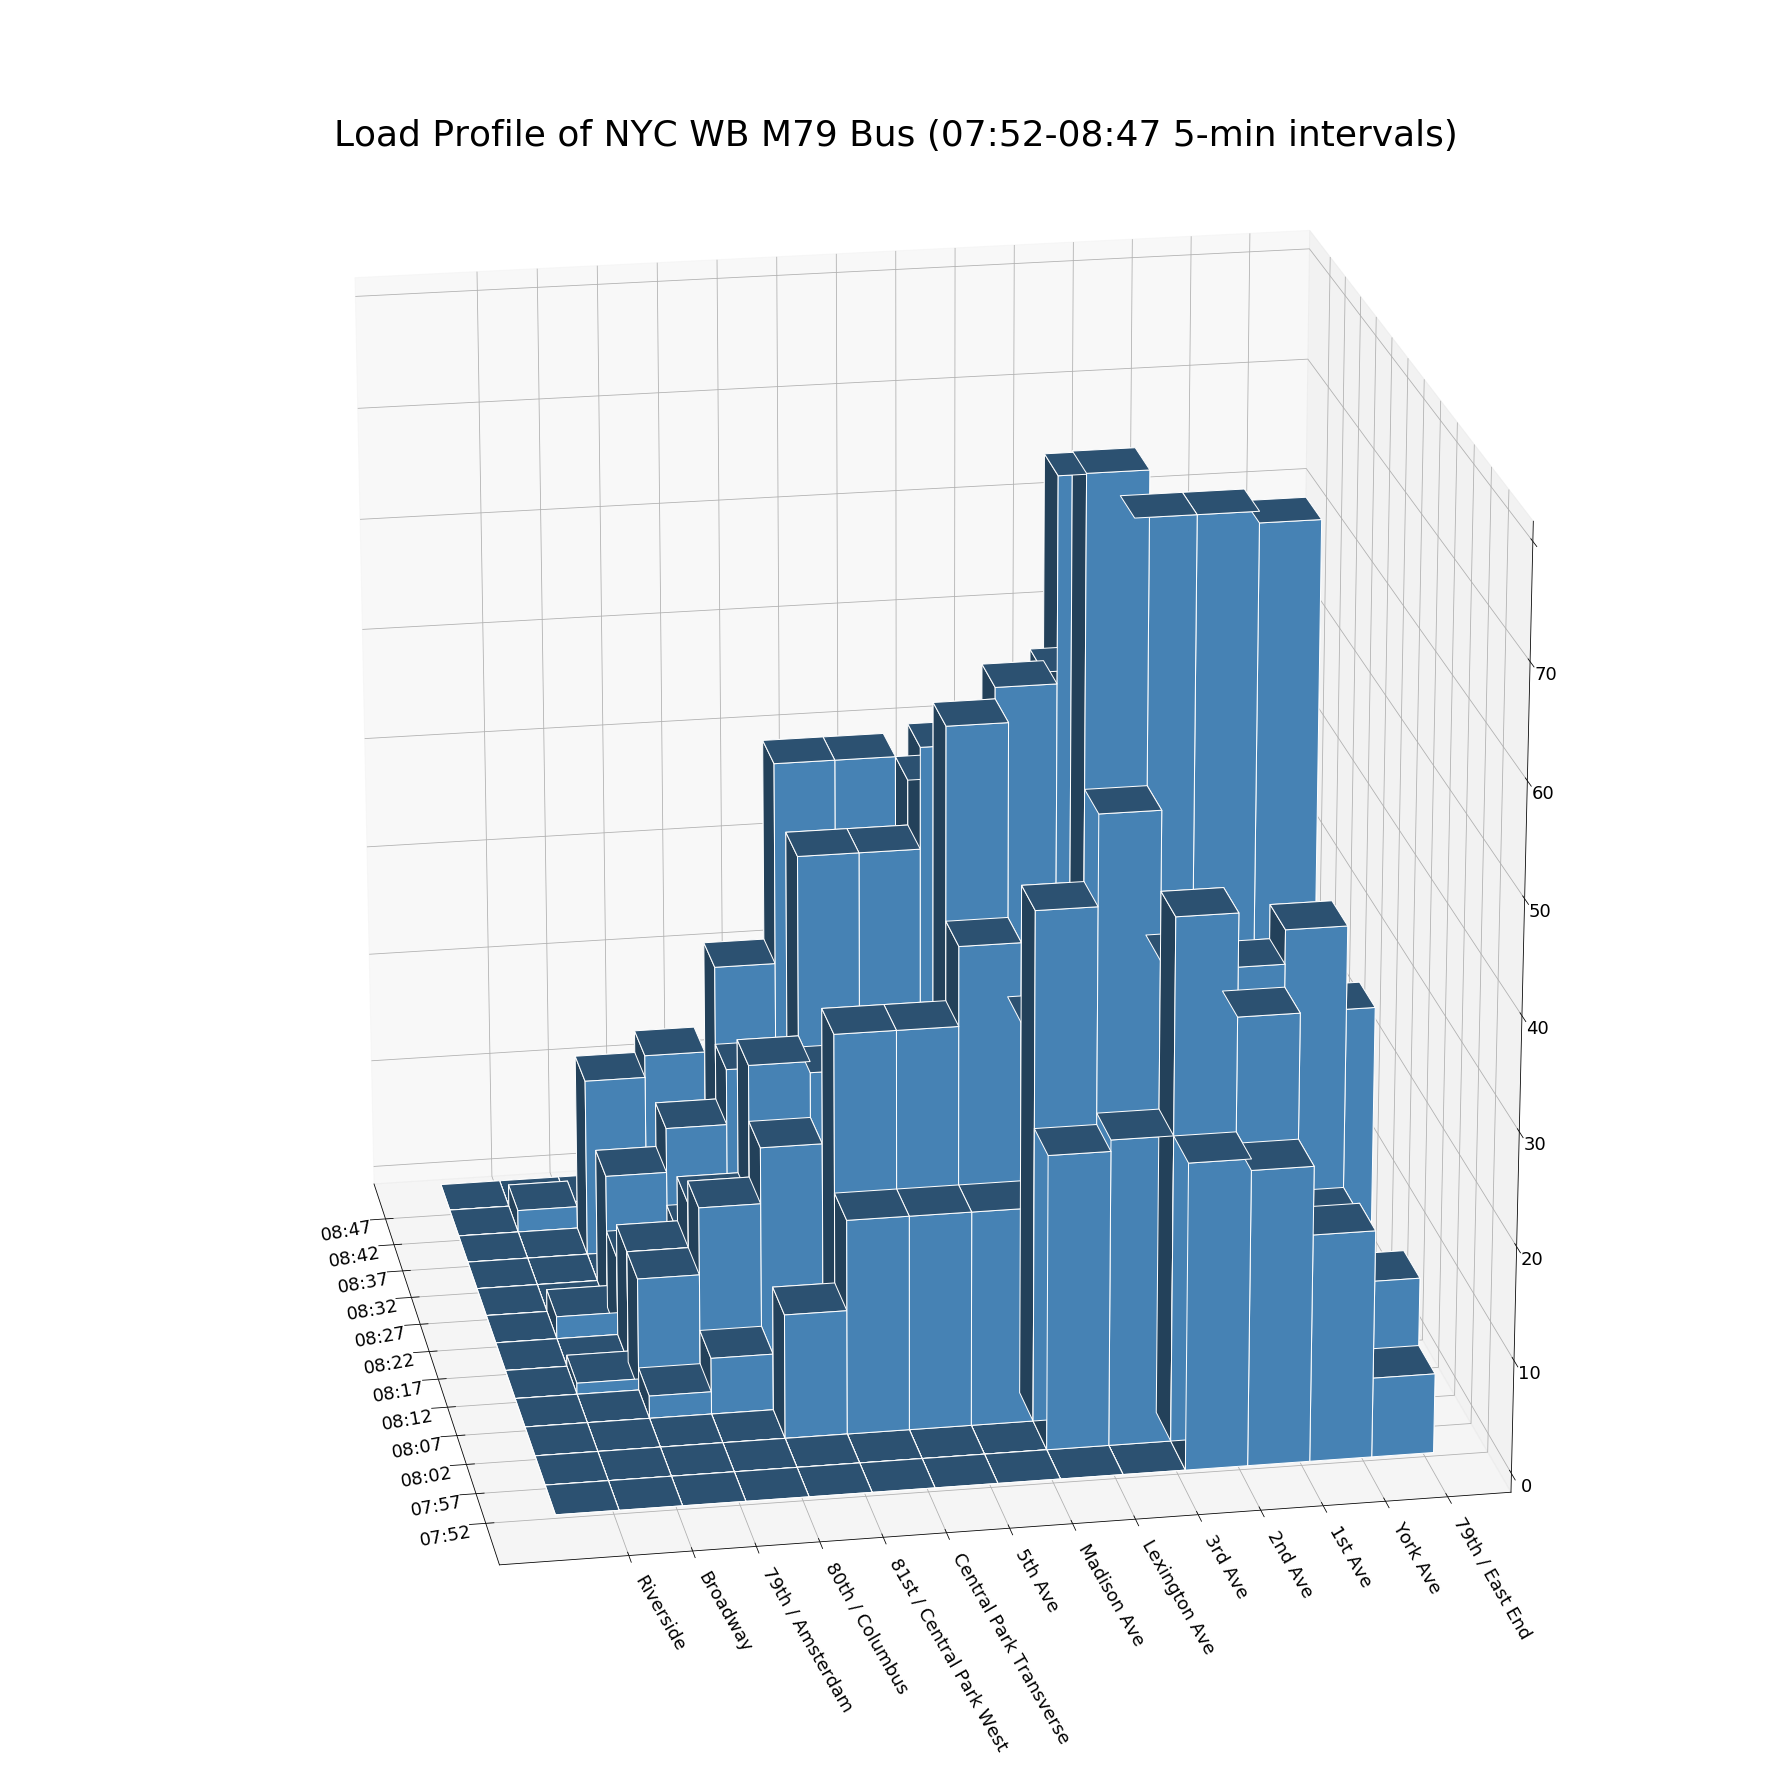

In [3]:
x = np.arange(len(df2.columns))
y = np.arange(len(df2.index))
X,Y = np.meshgrid(x,y)
Z = np.array(df2.as_matrix())

x_data = X.flatten()
y_data = Y.flatten()
z_data = Z.flatten()

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x_data, y_data, np.zeros(len(z_data)),
         1, 1, z_data, color='steelblue', edgecolor='white')

ax.set_xticks(np.arange(len(df2.columns))+0.5)
ax.set_yticks(np.arange(len(df2.index)))
ax.set_xticklabels(df2.columns, rotation=10, fontsize=18, ha='right', va='center')
ax.set_yticklabels(df2.index, rotation=300, fontsize=18, ha='left', va='top')
ax.set_zticklabels(np.arange(0, 80, 10), fontsize=18)

ax.view_init(20, 170)
plt.title('Load Profile of NYC WB M79 Bus (07:52-08:47 5-min intervals)', fontsize=36)
plt.tight_layout()
plt.show()
fig.savefig('load_profile_3d.png', dpi=300)

# for angle in range(0, 360, 10):
#     ax.view_init(30, angle)
#     time.sleep(0.1)
#     clear_output(wait=True)
#     display(fig)

# x_data, y_data = np.meshgrid(np.arange(data_array.shape[1]),
#                              np.arange(data_array.shape[0]))

# 3. Full Period Load Profile

In [4]:
df3 = pd.DataFrame([df2.sum(axis=1), df['distance']]).T
df3.columns = ['pax', 'dist']
df3

,pax,dist
stop,,
79th / East End,67.0,217.0
York Ave,187.0,144.0
1st Ave,255.0,287.0
2nd Ave,274.0,218.0
3rd Ave,293.0,167.0
Lexington Ave,238.0,229.0
Madison Ave,213.0,162.0
5th Ave,193.0,514.0
Central Park Transverse,183.0,522.0


In [5]:
# create an array for starting point for each stop based on their distances (meter)
left = 0
lefts = [0]
for d in df3['dist'][:-1]:
    left += d
    lefts.append(left)
lefts = np.array(lefts)
lefts

array([    0.,   217.,   361.,   648.,   866.,  1033.,  1262.,  1424.,
        1938.,  2460.,  2761.,  3102.,  3323.,  3542.])

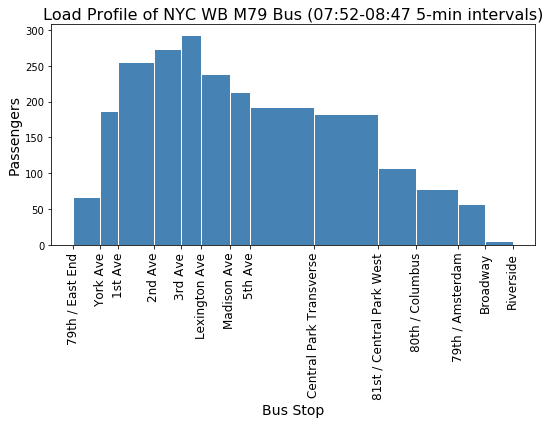

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.bar(lefts/100, df3['pax'], df3['dist']/100, align='edge', color='steelblue', ec='white')

ax.set_xticks(lefts/100)
ax.set_xticklabels(df3.index, fontsize=12, rotation=90)

plt.xlabel('Bus Stop', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.title('Load Profile of NYC WB M79 Bus (07:52-08:47 5-min intervals)', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('load_profile_2d_dist.png', dpi=300)

# 4. Frequency Justification

In [7]:
# generate data table for analysis
Pmj = df3['pax'].max()
df3['space'] = Pmj - df3['pax']
df3['Aij'] = df3['pax'] * df3['dist'] / 1000
df3

,pax,dist,space,Aij
stop,,,,
79th / East End,67.0,217.0,226.0,14.539
York Ave,187.0,144.0,106.0,26.928
1st Ave,255.0,287.0,38.0,73.185
2nd Ave,274.0,218.0,19.0,59.732
3rd Ave,293.0,167.0,0.0,48.931
Lexington Ave,238.0,229.0,55.0,54.502
Madison Ave,213.0,162.0,80.0,34.506
5th Ave,193.0,514.0,100.0,99.202
Central Park Transverse,183.0,522.0,110.0,95.526


In [29]:
# calculate basic statistics
Fmj = 7
c = 90
doj = 52
Aj = df3['Aij'].sum()
L = df3['dist'].sum() / 1000
Psum = 388

Aj, L, Pmj, Psum

(579.548, 3.542, 293.0, 388)

In [9]:
# see results for Method 3
Aj / (doj * L), Pmj / c, Fmj

(3.146570820483864, 3.2555555555555555, 7)

In [10]:
# Method 3
Fj3 = max(Aj / (doj * L), Pmj / c, Fmj)
Fj3

7

In [11]:
# disregard Fmj
Fj2 = Pmj / doj
Fj3 = Aj / (doj * L)
Fj2, Fj3

(5.634615384615385, 3.146570820483864)

In [12]:
# calculate service level
h2 = Fj2 * doj
h3 = Fj3 * doj
h2, h3

(293.0, 163.62168266516093)

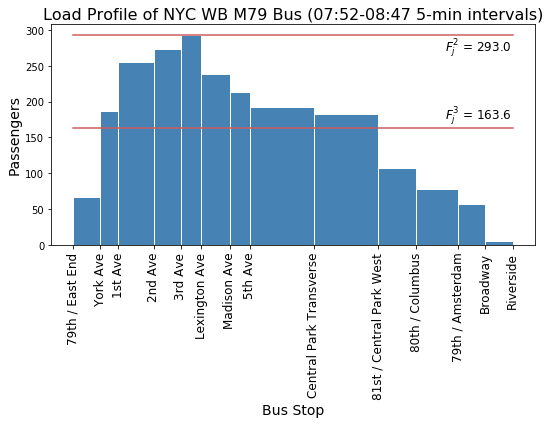

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.bar(lefts/100, df3['pax'], df3['dist']/100, align='edge', color='steelblue', ec='white')
ax.plot([0, L*10], [h2, h2], linestyle='-', color='indianred')
ax.plot([0, L*10], [h3, h3], linestyle='-', color='indianred')

ax.annotate('$F_j^2$ = %.1f'%(h2), (30,270), fontsize=12)
ax.annotate('$F_j^3$ = %.1f'%(h3), (30,175), fontsize=12)
ax.set_xticks(lefts/100)
ax.set_xticklabels(df3.index, fontsize=12, rotation=90)

plt.xlabel('Bus Stop', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.title('Load Profile of NYC WB M79 Bus (07:52-08:47 5-min intervals)', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('load_profile_2d_Fjx.png', dpi=300)

# 5. GTFS Bus Schedule
Data retrieved from [Transit Feeds](https://transitfeeds.com/p/mta/82).

In [14]:
# read in two latest schedules (original filename: stop_times.txt)
sch1 = pd.read_csv('schedule_0823.csv')
sch2 = pd.read_csv('schedule_1223.csv')

In [15]:
# subset for Weekday M79-SBS
c1 = np.array(['SB79' in t for t in sch1['trip_id']])
c2 = np.array(['Weekday' in t for t in sch1['trip_id']])
sch1 = sch1[c1 * c2]
sch1.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,MQ_O7-Weekday-005700_SB79_1,00:57:00,00:57:00,403522,1,0,0
1,MQ_O7-Weekday-005700_SB79_1,00:57:57,00:57:57,403523,2,0,0
2,MQ_O7-Weekday-005700_SB79_1,00:58:56,00:58:56,401024,3,0,0
3,MQ_O7-Weekday-005700_SB79_1,01:01:06,01:01:06,401867,4,0,0
4,MQ_O7-Weekday-005700_SB79_1,01:02:09,01:02:09,401868,5,0,0


In [16]:
c1 = np.array(['SB79' in t for t in sch2['trip_id']])
c2 = np.array(['Weekday' in t for t in sch2['trip_id']])
sch2 = sch2[c1 * c2]
sch2.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
66530,MQ_J8-Weekday-005700_SB79_1,00:57:00,00:57:00,403522,1,0,0
66531,MQ_J8-Weekday-005700_SB79_1,00:57:57,00:57:57,403523,2,0,0
66532,MQ_J8-Weekday-005700_SB79_1,00:58:56,00:58:56,401024,3,0,0
66533,MQ_J8-Weekday-005700_SB79_1,01:01:06,01:01:06,401867,4,0,0
66534,MQ_J8-Weekday-005700_SB79_1,01:02:09,01:02:09,401868,5,0,0


In [17]:
sch1['time'] = pd.to_datetime(sch1['arrival_time'], errors='coerce').dt.time
sch2['time'] = pd.to_datetime(sch2['arrival_time'], errors='coerce').dt.time

In [18]:
sch2.reset_index(inplace=True)
sch2.drop('index', axis=1, inplace=True)

In [19]:
# run this import again if previous import does not work (unknown issue)
from datetime import datetime

In [20]:
# subset by time period
begin = datetime.strptime('07:50:00', '%H:%M:%S').time()
end = datetime.strptime('08:20:00', '%H:%M:%S').time()

sch1['begin'] = pd.Series([begin] * len(sch1))
sch1['end'] = pd.Series([end] * len(sch1))
sch2['begin'] = pd.Series([begin] * len(sch2))
sch2['end'] = pd.Series([end] * len(sch2))

sch1 = sch1[np.array(sch1['time'] > sch1['begin']) * np.array(sch1['time'] < sch1['end'])]
sch2 = sch2[np.array(sch2['time'] > sch2['begin']) * np.array(sch2['time'] < sch2['end'])]

# not working
# [t > begin for t in sch1['time']]
# list(map(lambda x: (x < begin), sch1['time']))

In [21]:
# subset by initial stop
# stop_id for "E 79 ST/EAST END AV": 401880
r1 = sch1[sch1['stop_id'] == 401880]
r1

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,time,begin,end
238,MQ_O7-Weekday-048500_SB79_1,08:05:00,08:05:00,401880,1,0,0,08:05:00,07:50:00,08:20:00
630,MQ_O7-Weekday-047300_SB79_3,07:53:00,07:53:00,401880,1,0,0,07:53:00,07:50:00,08:20:00
2324,MQ_O7-Weekday-047900_SB79_11,07:59:00,07:59:00,401880,1,0,0,07:59:00,07:50:00,08:20:00
2422,MQ_O7-Weekday-049100_SB79_13,08:11:00,08:11:00,401880,1,0,0,08:11:00,07:50:00,08:20:00
2716,MQ_O7-Weekday-049700_SB79_2,08:17:00,08:17:00,401880,1,0,0,08:17:00,07:50:00,08:20:00


In [22]:
# for sch2, add an additional subset by trip_id to see only single group of data
# run next block to see why
c3 = ['SDon' in t for t in sch2['trip_id']]
r2 = sch2[c3][sch2['stop_id'] == 401880]
r2

/Users/Yuwen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,time,begin,end
13244,MQ_A8-Weekday-SDon-047200_SB79_3,07:52:00,07:52:00,401880,1,0,0,07:52:00,07:50:00,08:20:00
13258,MQ_A8-Weekday-SDon-048000_SB79_10,08:00:00,08:00:00,401880,1,0,0,08:00:00,07:50:00,08:20:00
13272,MQ_A8-Weekday-SDon-048400_SB79_1,08:04:00,08:04:00,401880,1,0,0,08:04:00,07:50:00,08:20:00
13286,MQ_A8-Weekday-SDon-048800_SB79_11,08:08:00,08:08:00,401880,1,0,0,08:08:00,07:50:00,08:20:00
13300,MQ_A8-Weekday-SDon-049200_SB79_2,08:12:00,08:12:00,401880,1,0,0,08:12:00,07:50:00,08:20:00
13314,MQ_A8-Weekday-SDon-049600_SB79_12,08:16:00,08:16:00,401880,1,0,0,08:16:00,07:50:00,08:20:00
16926,MQ_A8-Weekday-SDon-047600_SB79_9,07:56:00,07:56:00,401880,1,0,0,07:56:00,07:50:00,08:20:00


In [23]:
# https://rideschedules.com/schedule.html?16687
#sch2[sch2['stop_id'] == 401880].sort_values('time')

In [24]:
r1['arrival_time'].sort_values()

630     07:53:00
2324    07:59:00
238     08:05:00
2422    08:11:00
2716    08:17:00
Name: arrival_time, dtype: object

In [25]:
r2['arrival_time'].sort_values()

13244    07:52:00
16926    07:56:00
13258    08:00:00
13272    08:04:00
13286    08:08:00
13300    08:12:00
13314    08:16:00
Name: arrival_time, dtype: object

In [26]:
# see full stopping schedule stop by stop for a given bus
sch2 = pd.read_csv('schedule_1223.csv')
sch2[sch2['trip_id'] == "MQ_A8-Weekday-SDon-048400_SB79_1"]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
1262038,MQ_A8-Weekday-SDon-048400_SB79_1,08:04:00,08:04:00,401880,1,0,0
1262039,MQ_A8-Weekday-SDon-048400_SB79_1,08:05:58,08:05:58,401881,2,0,0
1262040,MQ_A8-Weekday-SDon-048400_SB79_1,08:07:17,08:07:17,401882,3,0,0
1262041,MQ_A8-Weekday-SDon-048400_SB79_1,08:09:54,08:09:54,401883,4,0,0
1262042,MQ_A8-Weekday-SDon-048400_SB79_1,08:11:54,08:11:54,401884,5,0,0
1262043,MQ_A8-Weekday-SDon-048400_SB79_1,08:13:09,08:13:09,404860,6,0,0
1262044,MQ_A8-Weekday-SDon-048400_SB79_1,08:15:31,08:15:31,401887,7,0,0
1262045,MQ_A8-Weekday-SDon-048400_SB79_1,08:17:00,08:17:00,403989,8,0,0
1262046,MQ_A8-Weekday-SDon-048400_SB79_1,08:19:12,08:19:12,401889,9,0,0
1262047,MQ_A8-Weekday-SDon-048400_SB79_1,08:21:24,08:21:24,401890,10,0,0


In [27]:
# extract the planned WB departing schedule in the period for plotting
st1 = [str(t)[:-3] for t in r1['arrival_time'].sort_values()]
st2 = [str(t)[:-3] for t in r2['arrival_time'].sort_values()]
st3 = ['V', 'V', '08:01', 'V', 'No Show', '08:13', '08:18']

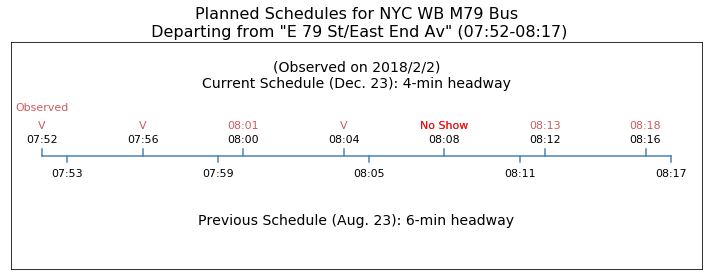

In [28]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.plot([0,10], [0,0], linestyle='-', color='steelblue')

for i, t in enumerate(st2):
    xpos = 1.6*i
    ax.plot([xpos,xpos], [0,0.03], linestyle='-', color='steelblue')
    ax.annotate(t, (xpos, 0.06), ha='center', fontsize=11)
    ax.annotate(st3[i], (xpos, 0.12), ha='center', fontsize=11, color='indianred')
    
for i, t in enumerate(st1):
    xpos = 0.4+2.4*i
    ax.plot([xpos,xpos], [0,-0.03], linestyle='-', color='steelblue')
    ax.annotate(t, (xpos, -0.09), ha='center', fontsize=11)

#ax.annotate(st2[4], (6.4, 0.06), ha='center', fontsize=11, color='red', label='No Show')
ax.annotate('No Show', (6.4, 0.12), ha='center', fontsize=11, color='red')
ax.annotate('Observed', (0, 0.20), ha='center', fontsize=11, color='indianred')
ax.annotate('(Observed on 2018/2/2)\nCurrent Schedule (Dec. 23): 4-min headway',
            (5, 0.3), ha='center', fontsize=14)
ax.annotate('Previous Schedule (Aug. 23): 6-min headway',
            (5, -0.3), ha='center', fontsize=14)

plt.xticks([])
plt.yticks([])
plt.ylim(-0.5, 0.5)
plt.title('Planned Schedules for NYC WB M79 Bus\n Departing from "E 79 St/East End Av" (07:52-08:17)', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('schedules.png', dpi=300)